# 优化和深度学习

In [151]:
import numpy as np
import torch
from mpl_toolkits import mplot3d

In [152]:
def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

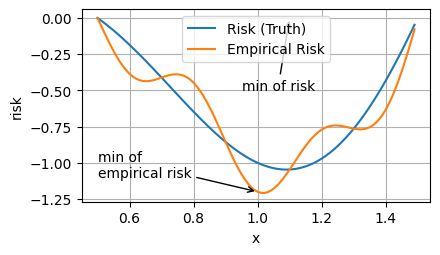

In [153]:
import torch
import matplotlib.pyplot as plt

# 2. [核心修改] 重写 annotate 函数，使其不依赖 d2l
def annotate(text, xy, xytext):
    """在图中添加带箭头的注解。"""
    # plt.gca() 获取当前的坐标轴对象，然后调用其 annotate 方法
    plt.gca().annotate(text, xy=xy, xytext=xytext,
                       arrowprops=dict(arrowstyle='->'))

# --- 主绘图逻辑 ---

# 3. 准备x轴数据
x = torch.arange(0.5, 1.5, 0.01)

# 4. [核心修改] 替换 d2l 的绘图函数
# 创建一个画布，并设置大小
plt.figure(figsize=(4.5, 2.5))

# 绘制 f(x) 和 g(x) 两条曲线
# d2l.plot(x, [y1, y2], ...) 相当于两条 plt.plot(...)
plt.plot(x, f(x), label='Risk (Truth)')
plt.plot(x, g(x), label='Empirical Risk')

# 设置坐标轴标签、图例和网格
plt.xlabel('x')
plt.ylabel('risk')
plt.legend()
plt.grid(True)

# 5. 调用重写后的 annotate 函数添加注解
# 注意：为了让箭头准确指向函数的最小值点，已修正第二个xy坐标
annotate('min of\nempirical risk', xy=(1.0, -1.2), xytext=(0.5, -1.1))
annotate('min of risk', xy=(1.1, 0.0), xytext=(0.95, -0.5)) # f(1.1) = 0

# 6. 显示图像
plt.show()

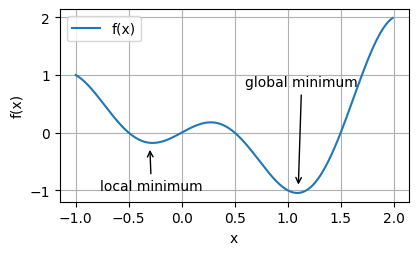

In [154]:
import torch
import math
import matplotlib.pyplot as plt

# 1. [新增] 定义一个示例函数 f(x)
#    我们选择一个包含多个极小值的函数，以匹配注解的场景
def f(x):
    return x * torch.cos(math.pi * x)

# 2. [复用] 提供独立的 annotate 函数
def annotate(text, xy, xytext):
    """在图中添加带箭头的注解。"""
    plt.gca().annotate(text, xy=xy, xytext=xytext,
                       arrowprops=dict(arrowstyle='->'))

# --- 主绘图逻辑 ---

# 3. 准备x轴数据
x = torch.arange(-1.0, 2.0, 0.01)

# 4. [核心修改] 替换 d2l 的绘图函数
# 创建一个画布
plt.figure(figsize=(4.5, 2.5))

# 绘制 f(x) 曲线
# d2l.plot(x, [f(x), ], ...) 相当于 plt.plot(x, f(x), ...)
plt.plot(x, f(x), label='f(x)')

# 设置坐标轴标签和图例
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
# 虽然只有一条线，但加上图例是个好习惯
plt.legend() 

# 5. 调用独立的 annotate 函数添加注解
# 注意：这里的坐标是根据原始d2l教程中的示例函数来设置的
annotate('local minimum', xy=(-0.3, -0.25), xytext=(-0.77, -1.0))
annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8))

# 6. 显示图像
plt.show()

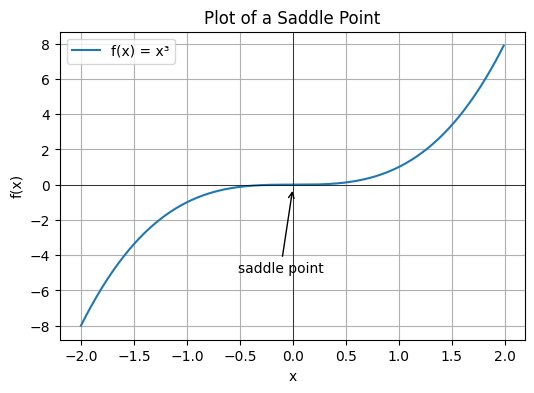

In [155]:
import torch
import matplotlib.pyplot as plt

# 1. [复用] 提供独立的 annotate 函数
def annotate(text, xy, xytext):
    """在图中添加带箭头的注解。"""
    # plt.gca() 获取当前的坐标轴对象，然后调用其 annotate 方法
    plt.gca().annotate(text, xy=xy, xytext=xytext,
                       arrowprops=dict(arrowstyle='->'))

# --- 主绘图逻辑 ---

# 2. 准备x轴数据 (与原代码相同)
x = torch.arange(-2.0, 2.0, 0.01)

# 3. [核心修改] 使用 matplotlib 替换 d2l.plot
# 创建一个画布，并可以指定大小
plt.figure(figsize=(6, 4))

# 绘制 f(x) = x**3 的曲线
# d2l.plot(x, [x**3], ...) 相当于 plt.plot(...)
plt.plot(x, x**3, label='f(x) = x³')

# 4. 设置图表的各种属性
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) # 添加x轴参考线
plt.axvline(0, color='black', linewidth=0.5) # 添加y轴参考线
plt.title('Plot of a Saddle Point')

# 5. 调用独立的 annotate 函数添加注解
# 注解文本、箭头指向的坐标xy、文本放置的坐标xytext
annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0))

# 6. 显示最终绘制的图像
plt.show()

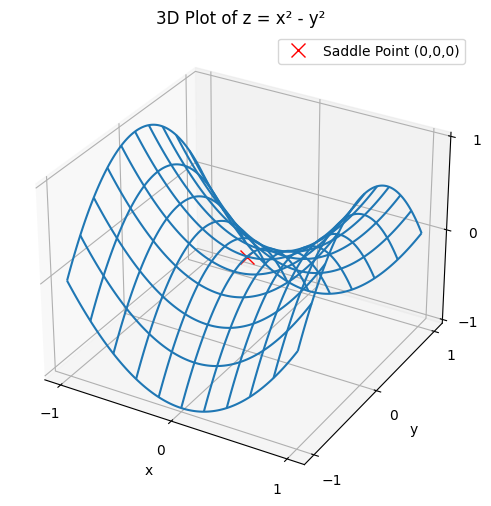

In [156]:
import torch
import matplotlib.pyplot as plt
# 显式导入3D绘图工具包，确保 '3d' 投影可用
from mpl_toolkits.mplot3d import Axes3D

# 1. 准备数据 (与原代码相同)
# 使用 indexing='xy' 以匹配matplotlib的期望输入，并避免PyTorch的警告
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101),
    torch.linspace(-1.0, 1.0, 101),
    indexing='xy'
)
z = x**2 - y**2

# 2. [核心修改] 使用 matplotlib 创建3D图像
# 创建一个画布
fig = plt.figure(figsize=(8, 6))
# 在画布上添加一个3D坐标轴
ax = fig.add_subplot(111, projection='3d')

# 3. 绘制3D线框图 (ax.plot_wireframe是matplotlib的標準方法)
# 注意：绘图时需要将PyTorch张量转换为NumPy数组
ax.plot_wireframe(x.numpy(), y.numpy(), z.numpy(), **{'rstride': 10, 'cstride': 10})

# 4. 在原点(0,0,0)绘制一个红色的'x'标记
ax.plot([0], [0], [0], 'rx', markersize=10, label='Saddle Point (0,0,0)')

# 5. [核心修改] 使用ax对象的方法来设置坐标轴
ticks = [-1, 0, 1]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')  # 为z轴也添加标签
ax.legend()
ax.set_title('3D Plot of z = x² - y²')

# 6. 显示图像
plt.show()

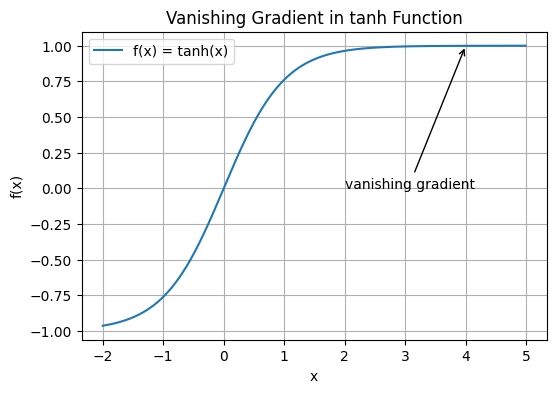

In [157]:
import torch
import matplotlib.pyplot as plt

# 1. [复用] 提供独立的 annotate 函数
def annotate(text, xy, xytext):
    """在图中添加带箭头的注解。"""
    # plt.gca() 获取当前的坐标轴对象，然后调用其 annotate 方法
    plt.gca().annotate(text, xy=xy, xytext=xytext,
                       arrowprops=dict(arrowstyle='->'))

# --- 主绘图逻辑 ---

# 2. 准备x轴数据 (与原代码相同)
x = torch.arange(-2.0, 5.0, 0.01)

# 3. [核心修改] 使用 matplotlib 替换 d2l.plot
# 创建一个画布
plt.figure(figsize=(6, 4))

# 绘制 f(x) = tanh(x) 的曲线
plt.plot(x.numpy(), torch.tanh(x).numpy(), label='f(x) = tanh(x)')

# 4. 设置图表的各种属性
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.title('Vanishing Gradient in tanh Function')

# 5. 调用独立的 annotate 函数添加注解
# 箭头指向 (4, 1) 这个点，该点位于tanh函数的饱和区
annotate('vanishing gradient', xy=(4, 1), xytext=(2, 0.0))

# 6. 显示最终绘制的图像
plt.show()

# 凸性

In [158]:
import numpy as np
import torch
from mpl_toolkits import mplot3d

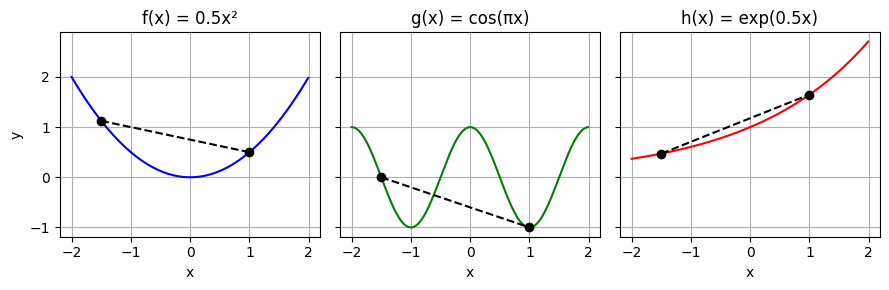

In [159]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. 定义三个函数 (与原代码相同)
f = lambda x: 0.5 * x**2  # 凸函数
g = lambda x: torch.cos(np.pi * x)  # 非凸函数
h = lambda x: torch.exp(0.5 * x)  # 凸函数

# 2. 准备x轴数据和要连接的线段端点 (与原代码相同)
x = torch.arange(-2, 2, 0.01)
segment = torch.tensor([-1.5, 1])

# 3. [核心修改] 使用 matplotlib 创建并绘制子图
# 创建一个包含1行3列子图的画布
# fig是整个画布对象，axes是一个包含3个坐标轴对象的数组
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

# 将函数、坐标轴对象和标题打包在一起方便遍历
funcs = [f, g, h]
titles = ['f(x) = 0.5x²', 'g(x) = cos(πx)', 'h(x) = exp(0.5x)']
colors = ['blue', 'green', 'red']

# 遍历每个坐标轴和对应的函数进行绘图
for i, ax in enumerate(axes):
    func = funcs[i]
    
    # a. 绘制函数本身的平滑曲线
    ax.plot(x.numpy(), func(x).numpy(), color=colors[i])
    
    # b. 绘制连接 segment 两端点的线段
    ax.plot(segment.numpy(), func(segment).numpy(), 
            color='black', marker='o', linestyle='--')
    
    # c. 设置每个子图的属性
    ax.set_xlabel('x')
    ax.set_title(titles[i])
    ax.grid(True)

# 设置共享的y轴标签
axes[0].set_ylabel('y')

# 调整布局防止标题重叠
fig.tight_layout()

# 4. 显示最终的图像
plt.show()

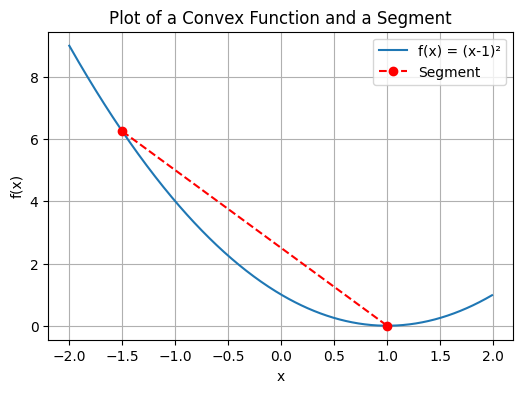

In [160]:
import torch
import matplotlib.pyplot as plt

# 1. 定义函数 (与原代码相同)
f = lambda x: (x - 1) ** 2

# 2. [新增] 准备绘图所需的数据
x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])

# 3. [核心修改] 使用 matplotlib 替换 d2l 的绘图函数
# 创建一个画布，并可以指定大小
plt.figure(figsize=(6, 4))

# a. 绘制函数 f(x) 的主曲线
plt.plot(x, f(x), label='f(x) = (x-1)²')

# b. 绘制连接 segment 两端点对应函数值的线段
plt.plot(segment, f(segment), 
         label='Segment', 
         color='red', 
         marker='o',    # 在端点处添加圆点标记
         linestyle='--')

# 4. 设置图表的各种属性
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.title('Plot of a Convex Function and a Segment')

# 5. 显示最终绘制的图像
plt.show()

# 梯度下降

In [161]:
import numpy as np
import torch


def f(x):  # 目标函数
    return x ** 2

def f_grad(x):  # 目标函数的梯度(导数)
    return 2 * x

In [162]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


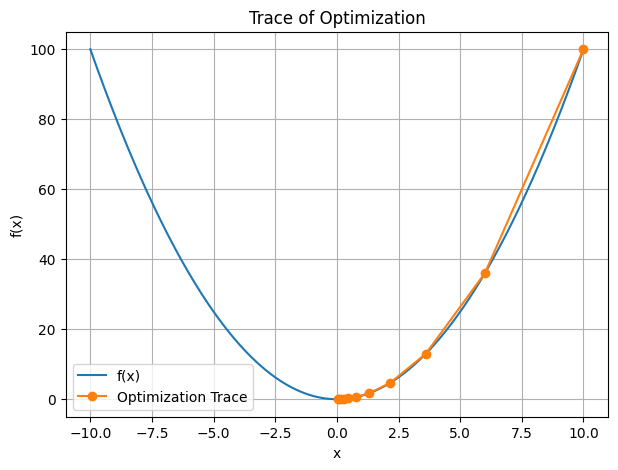

In [163]:
import torch
import matplotlib.pyplot as plt

def show_trace(results, f):
    """
    使用 Matplotlib 可视化优化过程的轨迹。

    参数:
    results (list or torch.Tensor): 包含优化过程中每一步 x 值的列表。
    f (function): 要优化的目标函数。
    """
    # 1. 确定绘图范围
    # 将输入转换为 tensor 以便计算
    results_tensor = torch.tensor(results, dtype=torch.float32)
    n = max(torch.abs(results_tensor.min()), torch.abs(results_tensor.max())).item()
    if n == 0: # 防止 n 为 0 的情况
        n = 1 

    # 2. 生成用于绘制函数曲线的数据点
    f_line_x = torch.arange(-n, n, 0.01)
    f_line_y = [f(x) for x in f_line_x]

    # 3. 计算轨迹的数据点
    trace_x = results
    trace_y = [f(x) for x in trace_x]

    # 4. 使用 Matplotlib 绘图 (替代 d2l.set_figsize 和 d2l.plot)
    plt.figure(figsize=(7, 5))  # 设置图形大小
    plt.plot(f_line_x.numpy(), f_line_y, '-', label='f(x)')  # 绘制函数曲线
    plt.plot(trace_x, trace_y, '-o', label='Optimization Trace')  # 绘制优化轨迹
    
    # 5. 添加标签、标题、图例和网格
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Trace of Optimization')
    plt.grid(True)
    plt.legend()
    
    # 6. 显示图形
    plt.show()

show_trace(results, f)

epoch 10, x: 3.486784


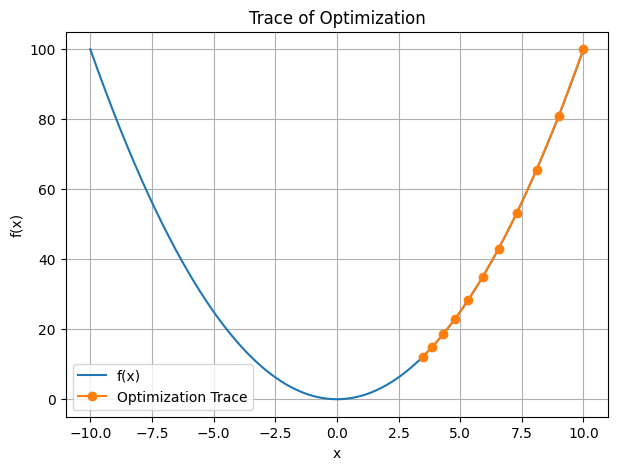

In [164]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.917364


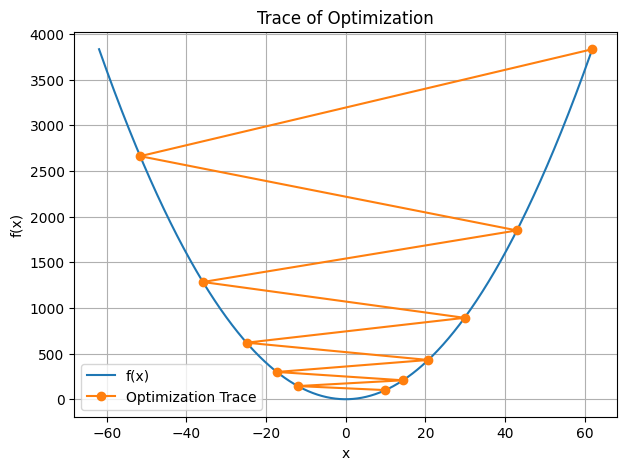

In [165]:
show_trace(gd(1.1, f_grad), f)

epoch 10, x: -1.528166


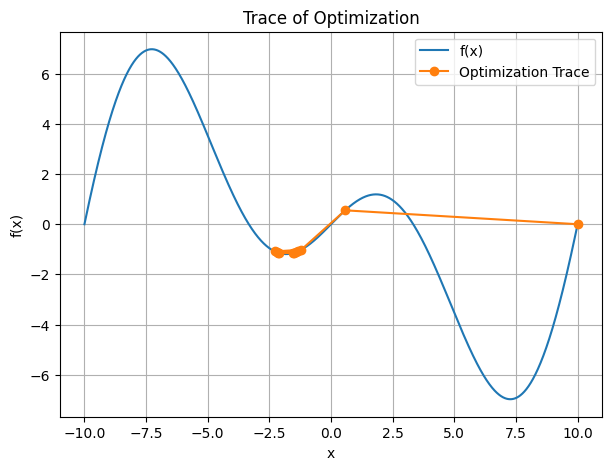

In [166]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # 目标函数
    return x * torch.cos(c * x)

def f_grad(x):  # 目标函数的梯度
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

In [167]:
import torch
import matplotlib.pyplot as plt

def train_2d(trainer, steps=20, f_grad=None):
    """用定制的训练机优化2D目标函数 (此函数无需修改)"""
    # s1和s2是稍后将使用的内部状态变量 (例如动量)
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1,s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):
    """显示优化过程中2D变量的轨迹 (使用 Matplotlib 重写)"""
    # 1. 设置画布大小
    plt.figure(figsize=(7, 5))
    
    # 2. 绘制优化轨迹
    # zip(*results) 将 [(x1,y1), (x2,y2), ...] 转换为 ([x1,x2,...], [y1,y2,...])
    # *zip(...) 将其解包为 x 坐标列表和 y 坐标列表，传给 plot
    plt.plot(*zip(*results), '-o', color='#ff7f0e', label='Optimization Path')

    # 3. 生成网格数据用于绘制等高线
    x1_vals = torch.arange(-5.5, 1.0, 0.1)
    x2_vals = torch.arange(-3.0, 1.0, 0.1)
    x1, x2 = torch.meshgrid(x1_vals, x2_vals, indexing='ij')

    # 4. 绘制背景等高线
    # .numpy() 用于将 torch.Tensor 转换为 matplotlib 可接受的 numpy array
    z = f(x1, x2)
    plt.contour(x1.numpy(), x2.numpy(), z.numpy(), colors='#1f77b4')
    
    # 5. 添加标签、标题和图例
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('2D Optimization Trace')
    plt.grid(True)
    plt.legend()
    plt.show()

epoch 20, x1: -0.057646, x2: -0.000073


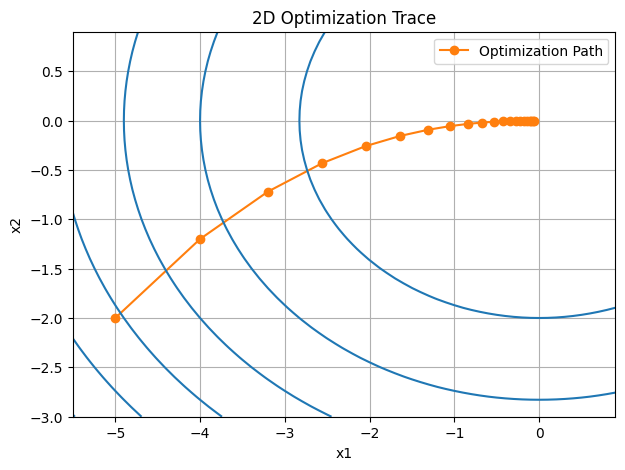

In [168]:
def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # 目标函数的梯度
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

epoch 10, x: tensor(0.)


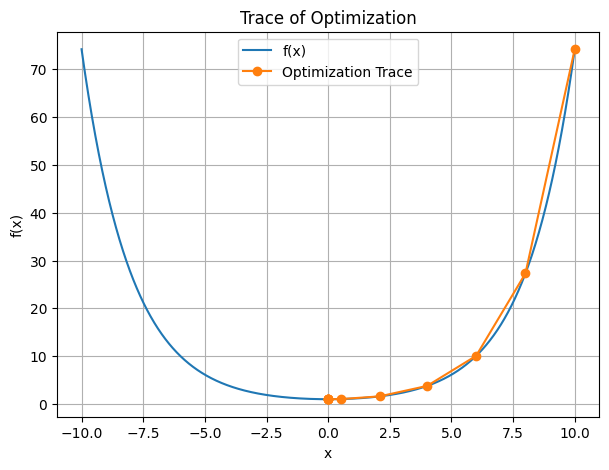

In [169]:
c = torch.tensor(0.5)

def f(x):  # O目标函数
    return torch.cosh(c * x)

def f_grad(x):  # 目标函数的梯度
    return c * torch.sinh(c * x)

def f_hess(x):  # 目标函数的Hessian
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)

epoch 10, x: tensor(26.8341)


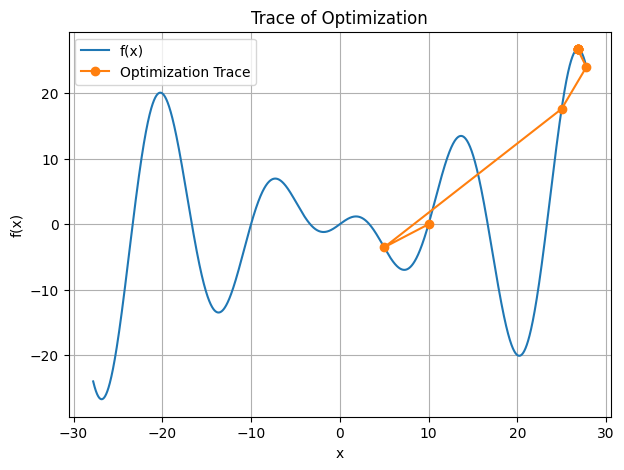

In [170]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # 目标函数
    return x * torch.cos(c * x)

def f_grad(x):  # 目标函数的梯度
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # 目标函数的Hessian
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


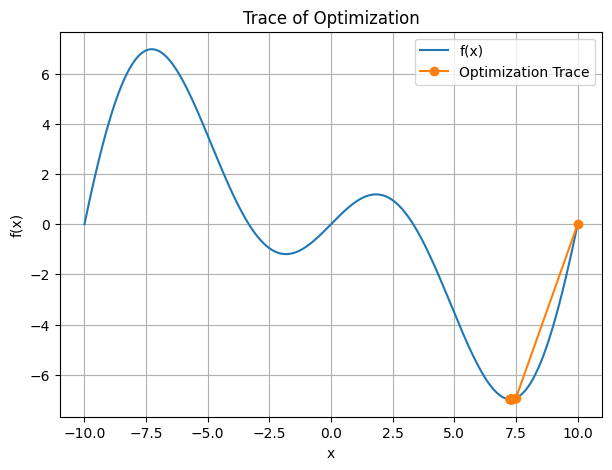

In [171]:
show_trace(newton(0.5), f)

# 随机梯度下降

In [172]:
import math
import torch

epoch 50, x1: 0.197142, x2: -0.008433


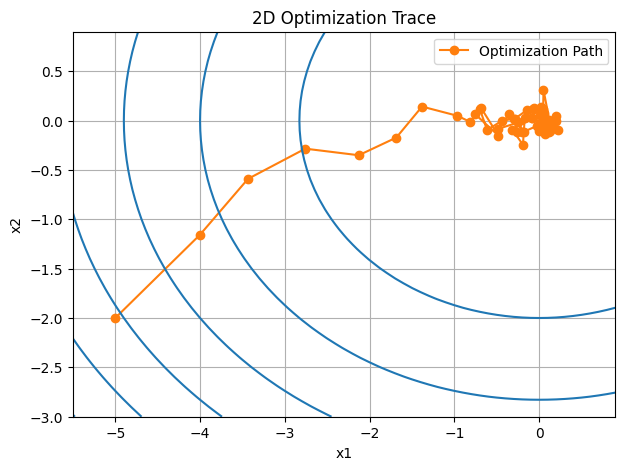

In [173]:
def f(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # 目标函数的梯度
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # 模拟有噪声的梯度
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # 常数学习速度
show_trace_2d(f, train_2d(sgd, steps=50, f_grad=f_grad))

epoch 1000, x1: -0.701055, x2: -0.061436


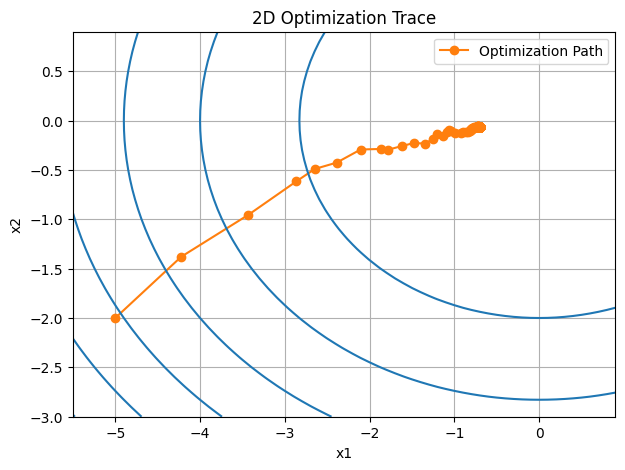

In [174]:
def exponential_lr():
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
show_trace_2d(f, train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: 0.017731, x2: 0.012535


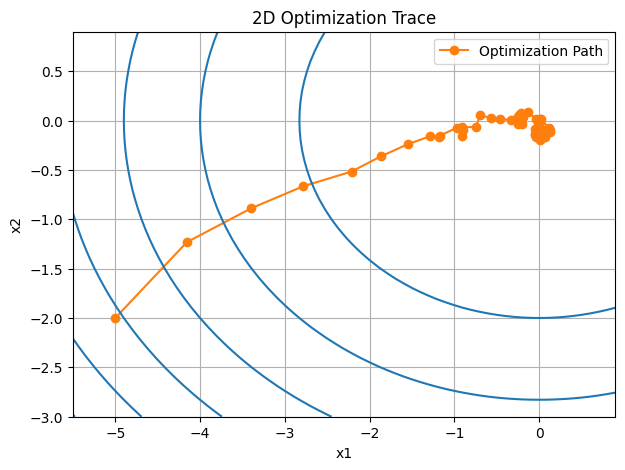

In [175]:
def polynomial_lr():
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
show_trace_2d(f, train_2d(sgd, steps=50, f_grad=f_grad))

# 小批量随机梯度下降

In [176]:
import numpy as np
import torch
from torch import nn
import time

class Timer:
    """一个简单的计时器类，用于记录多次运行时间。"""
    def __init__(self):
        self.times = []
        self._start_time = None

    def start(self):
        """启动计时器。"""
        self._start_time = time.time()

    def stop(self):
        """停止计时器并将经过的时间记录在列表中。"""
        if self._start_time is None:
            raise RuntimeError("Timer has not been started. Call start() before stop().")
        elapsed_time = time.time() - self._start_time
        self.times.append(elapsed_time)
        self._start_time = None
        return elapsed_time

    def avg(self):
        """返回平均时间。"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间的总和。"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间列表。"""
        # 为了避免对 numpy 的不必要依赖，这里用纯 Python 实现
        return [sum(self.times[:i+1]) for i in range(len(self.times))]

timer = Timer()
A = torch.zeros(256, 256)
B = torch.randn(256, 256)
C = torch.randn(256, 256)

In [177]:
# 逐元素计算A=BC
timer.start()
for i in range(256):
    for j in range(256):
        A[i, j] = torch.dot(B[i, :], C[:, j])
timer.stop()

0.4143688678741455

In [178]:
# 逐列计算A=BC
timer.start()
for j in range(256):
    A[:, j] = torch.mv(B, C[:, j])
timer.stop()

0.007271289825439453

In [179]:
# 一次性计算A=BC
timer.start()
A = torch.mm(B, C)
timer.stop()

# 乘法和加法作为单独的操作（在实践中融合）
gigaflops = [2/i for i in timer.times]
print(f'performance in Gigaflops: element {gigaflops[0]:.3f}, '
      f'column {gigaflops[1]:.3f}, full {gigaflops[2]:.3f}')

# performance in Gigaflops: element 4.301, column 296.124, full 1446.062

performance in Gigaflops: element 4.827, column 275.054, full 646.222


In [180]:
timer.start()
for j in range(0, 256, 64):
    A[:, j:j+64] = torch.mm(B, C[:, j:j+64])
timer.stop()
print(f'performance in Gigaflops: block {2 / timer.times[3]:.3f}')

performance in Gigaflops: block 1479.472


In [181]:
import os
import requests
import hashlib
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

# Helper functions to replace d2l.download
def download(url, cache_dir=os.path.join('.', 'data')):
    """Downloads a file, caches it, and returns the local file path."""
    os.makedirs(cache_dir, exist_ok=True)
    filename = os.path.join(cache_dir, url.split('/')[-1])
    
    if not os.path.exists(filename):
        print(f'Downloading {url} to {filename}...')
        try:
            r = requests.get(url, stream=True, verify=True)
            r.raise_for_status()
            with open(filename, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
        except Exception as e:
            print(f"Error during download: {e}")
            if os.path.exists(filename):
                os.remove(filename) # Clean up failed download
            return None
            
    # Verify the downloaded file
    sha1_hash = '76e5be1548fd8222e5074cf0faae75edff8cf93f'
    with open(filename, 'rb') as f:
        sha1 = hashlib.sha1()
        while True:
            data = f.read(1048576)  # Read in 1MB chunks
            if not data:
                break
            sha1.update(data)
    
    if sha1.hexdigest() == sha1_hash:
        return filename
    else:
        print("SHA1 hash mismatch. File may be corrupted.")
        os.remove(filename) # Clean up corrupted file
        return None

def get_data_ch11(batch_size=10, n=1500):
    """
    Loads the airfoil dataset.

    This function downloads, verifies, and preprocesses the data,
    then returns a PyTorch DataLoader.
    """
    # 1. Download and get the local file path
    DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/airfoil_self_noise.dat'
    filepath = download(DATA_URL)
    if not filepath:
        return None, None

    # 2. Load the data using NumPy
    data = np.genfromtxt(filepath, dtype=np.float32, delimiter='\t')
    
    # 3. Normalize the data and convert to a PyTorch tensor
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    
    # 4. Create a PyTorch DataLoader (replaces d2l.load_array)
    features = data[:n, :-1]
    labels = data[:n, -1]
    dataset = TensorDataset(features, labels)
    data_iter = DataLoader(dataset, batch_size, shuffle=True)
    
    num_features = features.shape[1]
    
    return data_iter, num_features

In [182]:
def sgd(params, states, hyperparams):
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad)
        p.grad.data.zero_()

In [183]:
import torch
import time
import matplotlib.pyplot as plt

def linreg(X, w, b):
    """线性回归模型。"""
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    """平方损失函数。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

def evaluate_loss(net, data_iter, loss_fn):
    """在指定数据集上评估模型的损失。"""
    total_loss, num_samples = 0.0, 0
    with torch.no_grad(): # 评估时不需要计算梯度
        for X, y in data_iter:
            l = loss_fn(net(X), y)
            total_loss += l.sum()
            num_samples += y.numel()
    return total_loss / num_samples

def train_ch11(trainer_fn, states, hyperparams, data_iter,
               feature_dim, num_epochs=2):
    """训练函数，不依赖d2l包。"""
    # 1. 初始化模型参数
    w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1),
                     requires_grad=True)
    b = torch.zeros((1), requires_grad=True)
    
    # 使用上面定义的辅助函数
    net, loss = lambda X: linreg(X, w, b), squared_loss

    # 2. 用列表替换 d2l.Animator 和 d2l.Timer
    # loss_records 列表用于存储 (epoch, loss) 元组
    loss_records = []
    # times 列表用于存储每个时间间隔的耗时
    times = []
    
    n = 0
    # 启动第一个时间间隔的计时
    timer_start = time.time()

    # 3. 训练模型
    print("开始训练...")
    for epoch in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X), y).mean()
            l.backward()
            trainer_fn([w, b], states, hyperparams)
            n += X.shape[0]
            
            # 每处理200个样本，记录一次损失和耗时
            if n % 200 == 0:
                # 停止计时并记录耗时
                timer_stop = time.time()
                times.append(timer_stop - timer_start)
                
                # 计算当前在整个数据集上的损失
                current_loss = evaluate_loss(net, data_iter, loss)
                
                # 计算当前训练进度（以epoch为单位），用于后续绘图
                # len(data_iter.dataset) 是总样本数
                epoch_progress = n / len(data_iter.dataset)
                loss_records.append((epoch_progress, current_loss.item()))
                
                # 重启计时器，为下一个时间间隔计时
                timer_start = time.time()

    # 4. 打印最终结果
    final_loss = loss_records[-1][1] if loss_records else float('nan')
    avg_interval_time = sum(times) / len(times) if times else 0
    
    # 原代码中的 "sec/epoch" 实际上是每个计时区间的平均耗时
    print(f'loss: {final_loss:.3f}, {avg_interval_time:.3f} sec/interval')

    # 5. 准备返回值 (模拟 d2l.Timer.cumsum 和 d2l.Animator.Y)
    # 计算累计时间
    cumulative_times = [sum(times[:i+1]) for i in range(len(times))]
    # 提取所有记录的损失值
    recorded_losses = [item[1] for item in loss_records]

    # (可选) 绘制损失曲线图，替代 d2l.Animator 的动态显示
    print("绘制损失曲线...")
    epochs_data = [item[0] for item in loss_records]
    plt.figure(figsize=(7, 5))
    plt.plot(epochs_data, recorded_losses, '-')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xlim([0, num_epochs])
    plt.ylim([0.22, 0.35]) # 沿用原代码的y轴范围
    plt.grid(True)
    plt.show()
    
    return cumulative_times, recorded_losses

开始训练...
loss: 0.248, 0.029 sec/interval
绘制损失曲线...


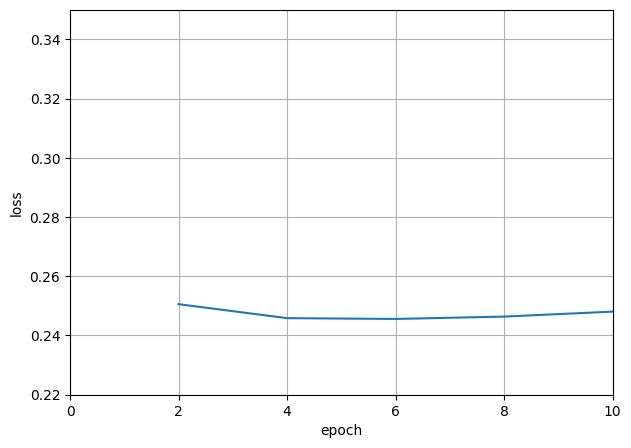

In [184]:
def train_sgd(lr, batch_size, num_epochs=2):
    data_iter, feature_dim = get_data_ch11(batch_size)
    return train_ch11(
        sgd, None, {'lr': lr}, data_iter, feature_dim, num_epochs)

gd_res = train_sgd(1, 1500, 10)

开始训练...
loss: 0.244, 0.015 sec/interval
绘制损失曲线...


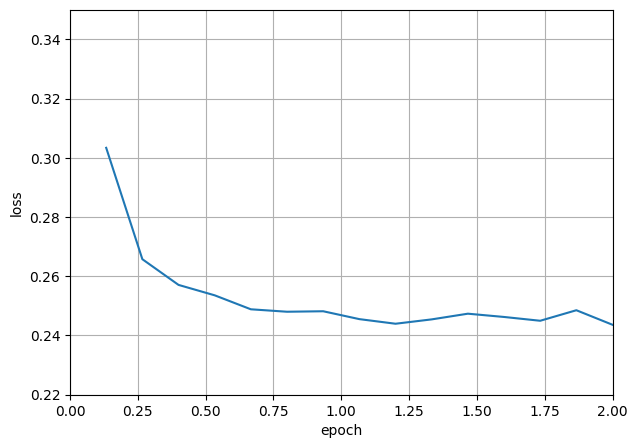

In [185]:
sgd_res = train_sgd(0.005, 1)

开始训练...
loss: 0.246, 0.004 sec/interval
绘制损失曲线...


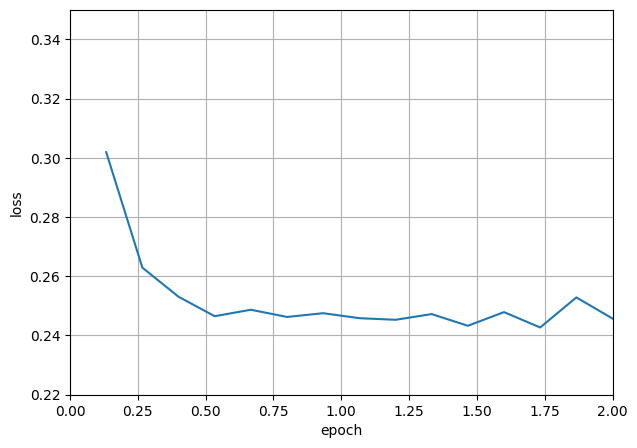

In [186]:
mini1_res = train_sgd(.4, 100)

开始训练...
loss: 0.245, 0.002 sec/interval
绘制损失曲线...


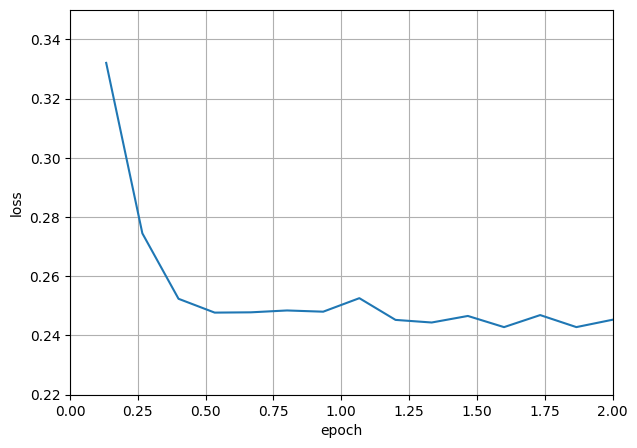

In [187]:
mini2_res = train_sgd(.05, 10)

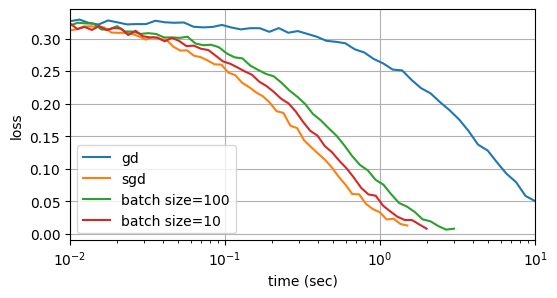

In [188]:
import matplotlib.pyplot as plt
import numpy as np # 用于生成示例数据

# =======================================================
# 1. 生成示例数据 (模拟您的输入数据)
# 在您的实际使用中，请删除这部分，并使用您自己的 `gd_res` 等变量。
# 假设每个 `_res` 变量的格式为： [时间点列表, 损失值列表]
def generate_dummy_data(t_max, initial_loss, decay, noise=0.01):
    times = np.logspace(-2, np.log10(t_max), 50)
    losses = initial_loss * np.exp(-decay * times) + np.random.rand(50) * noise
    return [times.tolist(), losses.tolist()]

gd_res = generate_dummy_data(t_max=10, initial_loss=0.32, decay=0.2)
sgd_res = generate_dummy_data(t_max=1.5, initial_loss=0.32, decay=2.5)
mini1_res = generate_dummy_data(t_max=3, initial_loss=0.32, decay=1.5)
mini2_res = generate_dummy_data(t_max=2, initial_loss=0.32, decay=2.0)
# =======================================================


# --- 以下是替代 d2l 的绘图代码 ---

# 1. 设置画布大小 (替代 d2l.set_figsize)
plt.figure(figsize=(6, 3))

# 2. 将要绘制的数据和图例标签配对
all_results = [gd_res, sgd_res, mini1_res, mini2_res]
legends = ['gd', 'sgd', 'batch size=100', 'batch size=10']

# 3. 循环绘制每一条线
# 这种方式比 d2l.plot 的复杂语法更清晰
for result, label in zip(all_results, legends):
    # result[0] 是 x 轴数据 (时间), result[1] 是 y 轴数据 (损失)
    plt.plot(result[0], result[1], label=label)

# 4. 设置坐标轴和图表属性
plt.xlabel('time (sec)')       # 设置x轴标签
plt.ylabel('loss')             # 设置y轴标签
plt.xlim([1e-2, 10])           # 设置x轴范围
plt.xscale('log')              # 将x轴设置为对数尺度
plt.grid(True)                 # 显示网格

# 5. 显示图例
plt.legend()

# 6. 显示图表
plt.show()

In [203]:
import torch

# def evaluate_loss(net, data_iter, loss_fn):
#     """在指定数据集上评估模型的损失 (替代 d2l.evaluate_loss)。"""
#     total_loss, num_samples = 0.0, 0
#     net.eval()  # 将模型设置为评估模式
#     with torch.no_grad():
#         for X, y in data_iter:
#             out = net(X)
#             y = y.reshape(out.shape)
#             l = loss_fn(out, y)
#             total_loss += l.sum()
#             num_samples += y.numel()
#     net.train()  # 将模型设置回训练模式
#     return total_loss / num_samples

def evaluate_loss(net_fn, data_iter, loss_fn):
        """在指定数据集上评估模型的损失。"""
        total_loss, num_samples = 0.0, 0
        with torch.no_grad(): # 评估时不需要计算梯度
            for X, y in data_iter:
                l = loss_fn(net_fn(X), y)
                total_loss += l.sum()
                num_samples += y.numel()
        return total_loss / num_samples

import time
import matplotlib.pyplot as plt
from torch import nn

def train_concise_ch11(trainer_fn, hyperparams, data_iter, num_epochs=4):
    """训练函数，不依赖d2l包。"""
    # 1. 初始化模型 (这部分无需修改)
    net = nn.Sequential(nn.Linear(5, 1))
    def init_weights(m):
        if type(m) == nn.Linear:
            torch.nn.init.normal_(m.weight, std=0.01)
    net.apply(init_weights)

    optimizer = trainer_fn(net.parameters(), **hyperparams)
    loss = nn.MSELoss(reduction='none')

    # 2. 用列表替换 d2l.Animator 和 d2l.Timer
    loss_history = []  # 存储 (epoch, loss) 用于绘图
    times = []         # 存储每个计时区间的耗时

    n = 0
    # 启动计时器
    timer_start = time.time()

    # 3. 训练模型
    for epoch in range(num_epochs):
        net.train() # 确保模型处于训练模式
        for X, y in data_iter:
            optimizer.zero_grad()
            out = net(X)
            y = y.reshape(out.shape)
            l = loss(out, y)
            l.mean().backward()
            optimizer.step()
            
            n += X.shape[0]
            if n % 1 == 0:
                # 停止计时并记录时间
                timer_stop = time.time()
                times.append(timer_stop - timer_start)
                
                # 评估损失并记录
                # 原代码除以2是为了与自定义的平方损失函数保持一致
                current_loss = evaluate_loss(net, data_iter, loss) / 2
                epoch_progress = n / len(data_iter.dataset)
                loss_history.append((epoch_progress, current_loss.item()))
                
                # 重启计时器
                timer_start = time.time()

    # 4. 打印最终结果
    final_loss = loss_history[-1][1] if loss_history else float('nan')
    avg_interval_time = sum(times) / len(times) if times else 0
    print(f'loss: {final_loss:.3f}, {avg_interval_time:.3f} sec/interval')

    # 5. 绘制损失曲线 (替代 d2l.Animator)
    epochs_data = [item[0] for item in loss_history]
    losses = [item[1] for item in loss_history]
    
    plt.figure(figsize=(7, 5))
    plt.plot(epochs_data, losses, '-')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xlim([0, num_epochs])
    plt.ylim([0.22, 0.35]) # 沿用原代码的y轴范围
    plt.grid(True)
    plt.show()

loss: 7.039, 0.002 sec/interval


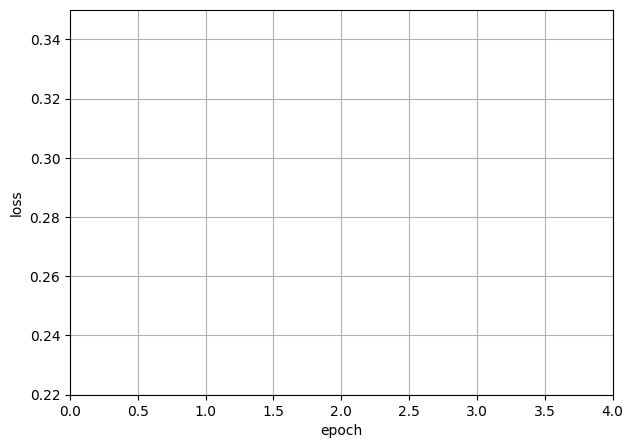

In [190]:
data_iter, _ = get_data_ch11(10)
trainer = torch.optim.SGD
train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

epoch 20, x1: -0.943467, x2: -0.000073


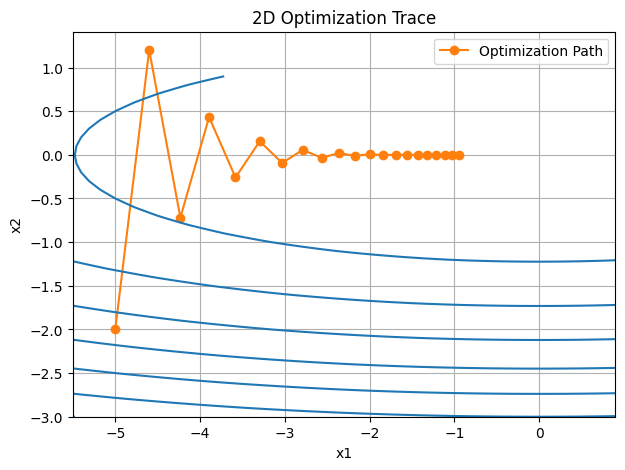

In [191]:
import torch

eta = 0.4
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))

epoch 20, x1: -0.387814, x2: -1673.365109


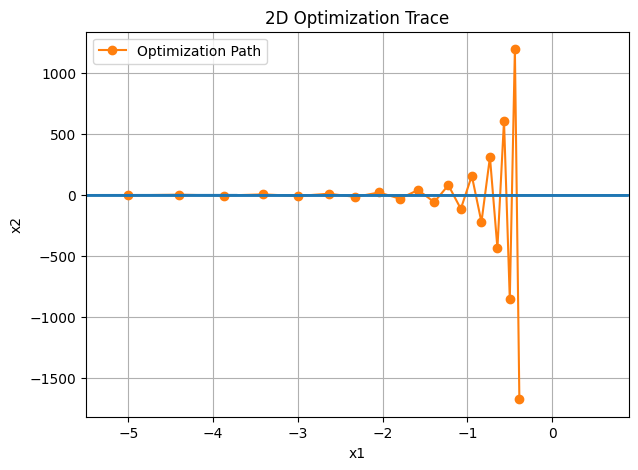

In [192]:
eta = 0.6
show_trace_2d(f_2d, train_2d(gd_2d))

epoch 20, x1: 0.007188, x2: 0.002553


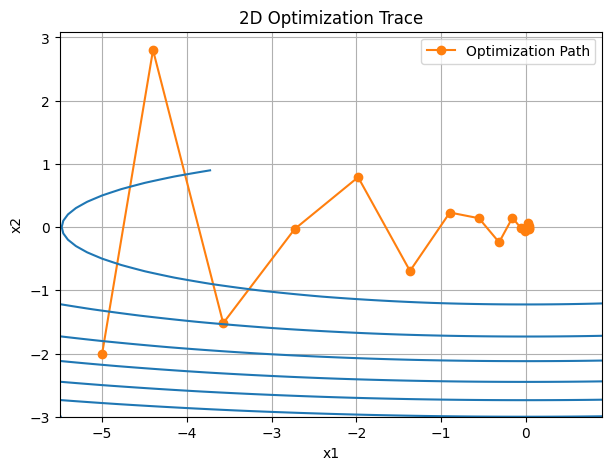

In [193]:
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.5
show_trace_2d(f_2d, train_2d(momentum_2d))

epoch 20, x1: -0.126340, x2: -0.186632


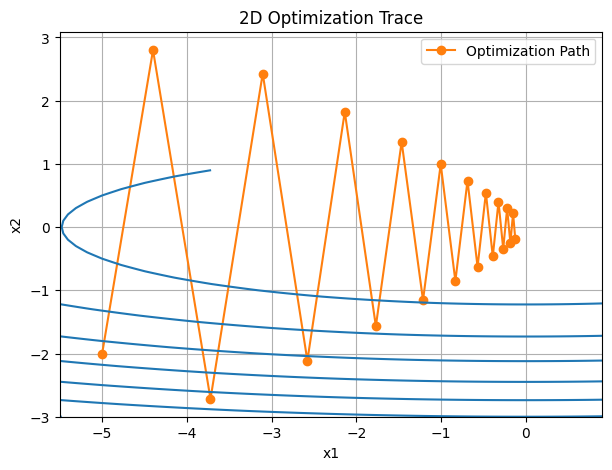

In [194]:
eta, beta = 0.6, 0.25
show_trace_2d(f_2d, train_2d(momentum_2d))

/Users/xuzhiyuan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26435 (\N{CJK UNIFIED IDEOGRAPH-6743}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xuzhiyuan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xuzhiyuan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xuzhiyuan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xuzhiyuan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 205

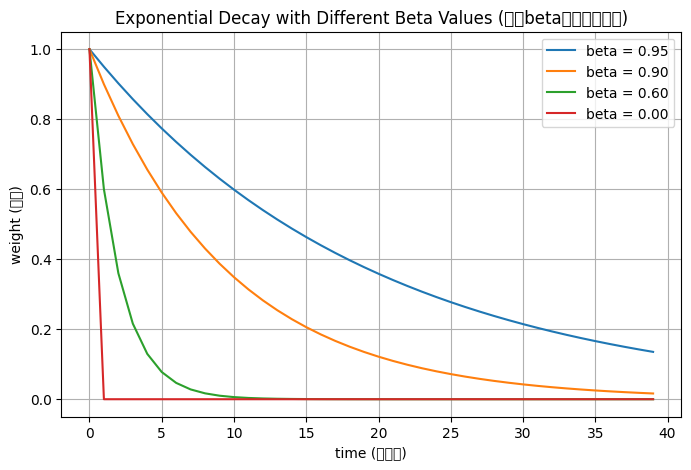

In [195]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 1. 设置画布大小 (替代 d2l.set_figsize)
plt.figure(figsize=(8, 5))

# 2. 定义要可视化的 beta 值
betas = [0.95, 0.9, 0.6, 0]

# 3. 循环绘制每个 beta 对应的指数衰减曲线
for beta in betas:
    # 生成 x 轴数据 (时间步)
    x = torch.arange(40).detach().numpy()
    
    # 计算 y 轴数据 (beta 的 x 次方)
    y = beta ** x
    
    # 使用 matplotlib 绘图，并为每条线添加标签
    plt.plot(x, y, label=f'beta = {beta:.2f}')

# 4. 添加标签、标题和图例 (替代 d2l.plt.xlabel 和 d2l.plt.legend)
plt.xlabel('time (时间步)')
plt.ylabel('weight (权重)')
plt.title('Exponential Decay with Different Beta Values (不同beta值的指数衰减)')
plt.grid(True)  # 添加网格线，方便查看
plt.legend()    # 显示图例

# 5. 显示最终的图表
plt.show()

In [196]:
def init_momentum_states(feature_dim):
    v_w = torch.zeros((feature_dim, 1))
    v_b = torch.zeros(1)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        with torch.no_grad():
            v[:] = hyperparams['momentum'] * v + p.grad
            p[:] -= hyperparams['lr'] * v
        p.grad.data.zero_()

开始训练...
loss: 0.243, 0.003 sec/interval
绘制损失曲线...


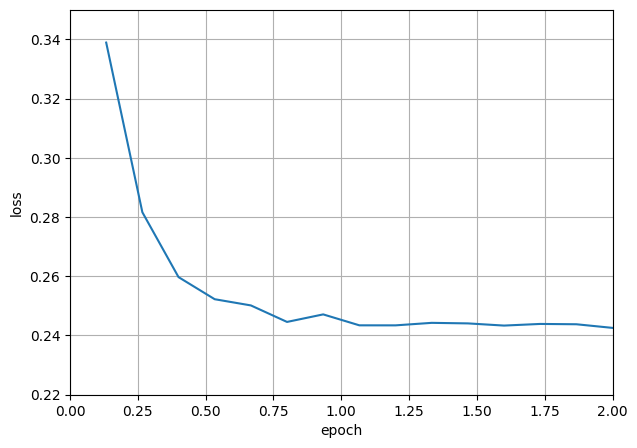

In [197]:
def train_momentum(lr, momentum, num_epochs=2):
    train_ch11(sgd_momentum, init_momentum_states(feature_dim),
                   {'lr': lr, 'momentum': momentum}, data_iter,
                   feature_dim, num_epochs)

data_iter, feature_dim = get_data_ch11(batch_size=10)
train_momentum(0.02, 0.5)

开始训练...
loss: 0.245, 0.003 sec/interval
绘制损失曲线...


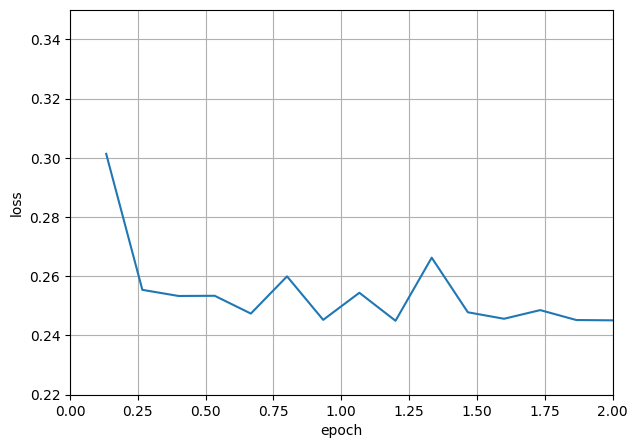

In [198]:
train_momentum(0.01, 0.9)

开始训练...
loss: 0.243, 0.003 sec/interval
绘制损失曲线...


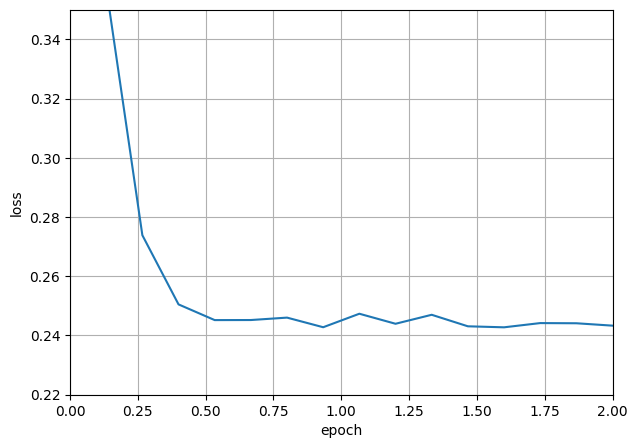

In [199]:
train_momentum(0.005, 0.9)

loss: 7.180, 0.000 sec/interval


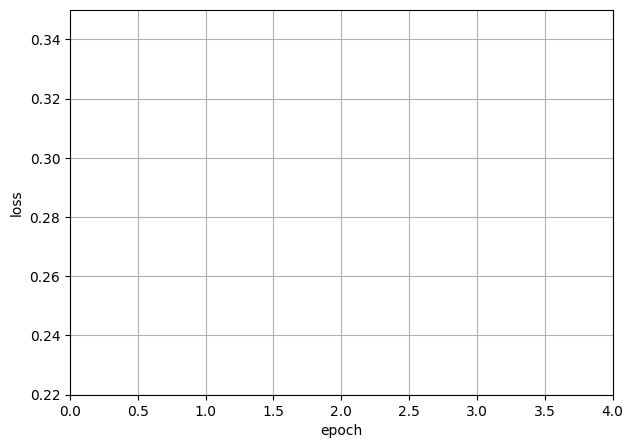

In [204]:
trainer = torch.optim.SGD
train_concise_ch11(trainer, {'lr': 0.005, 'momentum': 0.9}, data_iter)

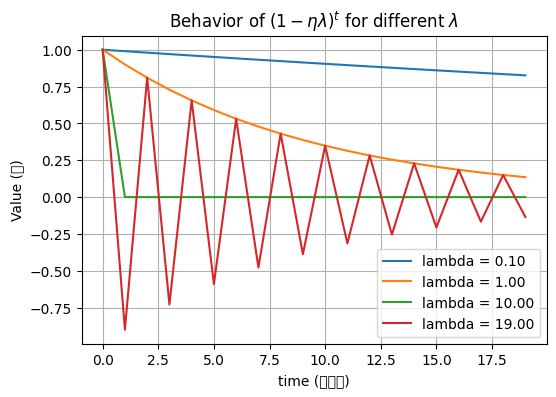

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 1. 定义超参数
lambdas = [0.1, 1, 10, 19]
eta = 0.1  # 学习率

# 2. 设置画布大小 (替代 d2l.set_figsize)
plt.figure(figsize=(6, 4))

# 3. 循环绘制每条曲线
for lam in lambdas:
    # 生成 x 轴数据 (时间步 t)
    t = torch.arange(20).detach().numpy()
    
    # 计算 y 轴数据
    y = (1 - eta * lam) ** t
    
    # 使用 matplotlib 绘图，并为每条线添加标签
    plt.plot(t, y, label=f'lambda = {lam:.2f}')

# 4. 添加标签、标题、图例和网格
plt.xlabel('time (时间步)')
plt.ylabel('Value (值)')
plt.title('Behavior of $(1 - \eta\lambda)^t$ for different $\lambda$') # 使用 LaTeX 语法美化公式
plt.grid(True)  # 添加网格线，方便观察
plt.legend()    # 显示图例 (替代 d2l.plt.legend)

# 5. 显示最终的图表
plt.show()

epoch 20, x1: -2.382563, x2: -0.158591


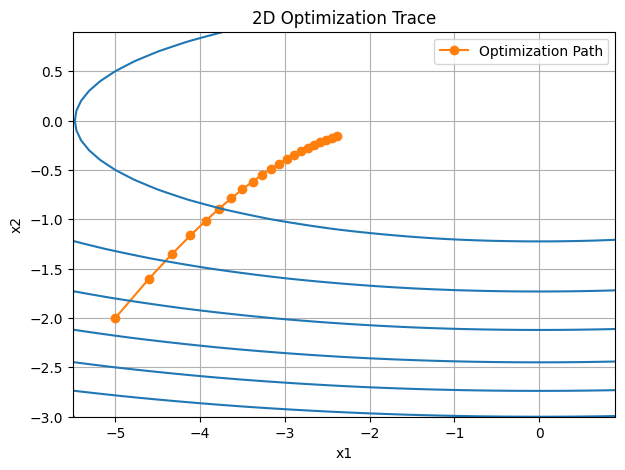

In [207]:
import math
import torch

def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
show_trace_2d(f_2d, train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


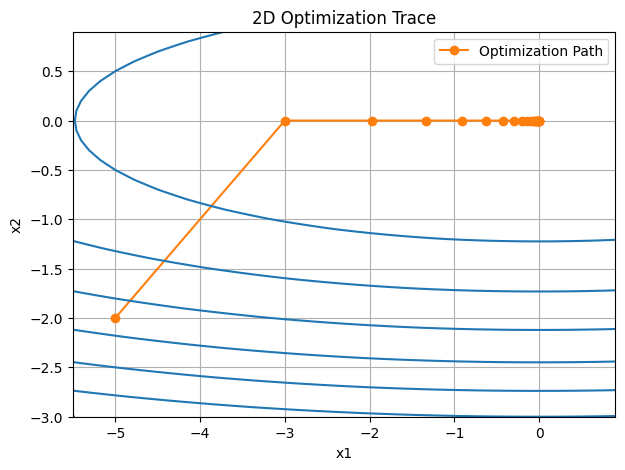

In [208]:
eta = 2
show_trace_2d(f_2d, train_2d(adagrad_2d))

In [209]:
def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

开始训练...
loss: 0.242, 0.008 sec/interval
绘制损失曲线...


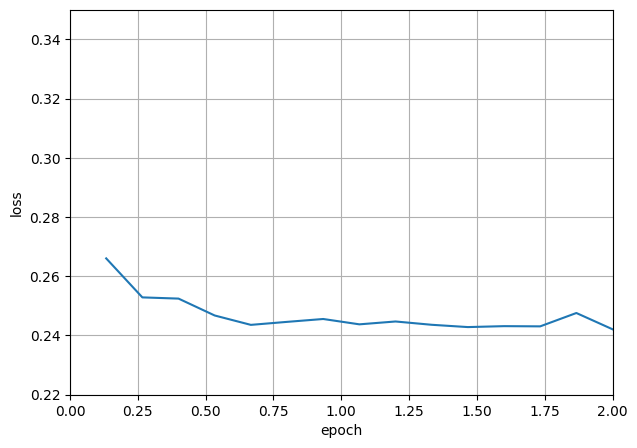

In [210]:
data_iter, feature_dim = get_data_ch11(batch_size=10)
train_ch11(adagrad, init_adagrad_states(feature_dim),
               {'lr': 0.1}, data_iter, feature_dim);

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss: 7.021, 0.000 sec/interval


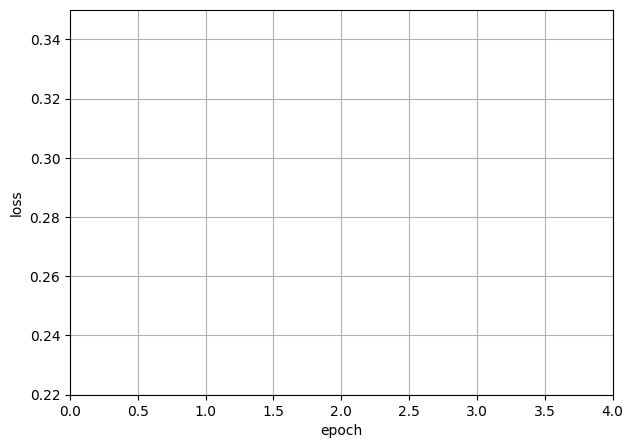

In [211]:
trainer = torch.optim.Adagrad
train_concise_ch11(trainer, {'lr': 0.1}, data_iter)

/Users/xuzhiyuan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26435 (\N{CJK UNIFIED IDEOGRAPH-6743}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xuzhiyuan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xuzhiyuan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xuzhiyuan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xuzhiyuan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 211

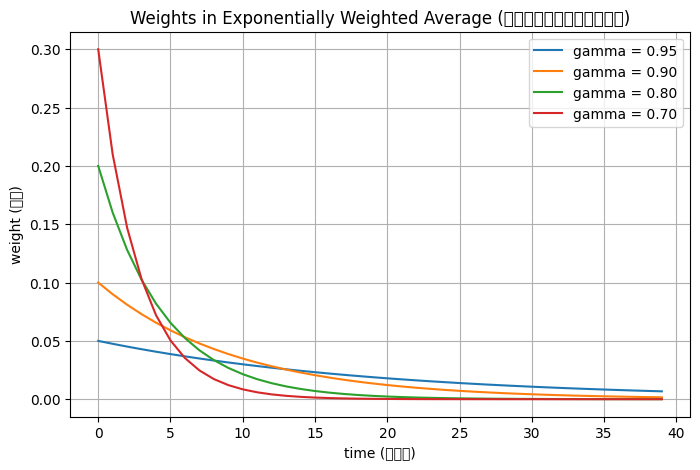

In [212]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 1. 设置画布大小 (替代 d2l.set_figsize)
plt.figure(figsize=(8, 5))

# 2. 定义要可视化的 gamma 值列表
gammas = [0.95, 0.9, 0.8, 0.7]

# 3. 循环遍历每个 gamma 值并绘制对应的权重分布曲线
for gamma in gammas:
    # 生成 x 轴数据 (代表过去的时间步)
    x = torch.arange(40).detach().numpy()
    
    # 计算 y 轴数据 (对应每个时间步的权重)
    # 表达式 (1-gamma) * gamma**x 是指数加权移动平均的权重系数
    y = (1 - gamma) * gamma ** x
    
    # 使用 matplotlib 绘图，并为每条线添加标签
    plt.plot(x, y, label=f'gamma = {gamma:.2f}')

# 4. 添加标签、标题、图例和网格 (替代 d2l.plt.xlabel)
plt.xlabel('time (时间步)')
plt.ylabel('weight (权重)')
plt.title('Weights in Exponentially Weighted Average (指数加权平均中的权重分布)')
plt.grid(True)  # 添加网格线，方便观察
plt.legend()    # 显示图例 (原代码缺少这行，但为了显示标签，需要加上)

# 5. 显示最终的图表
plt.show()

epoch 20, x1: -0.010599, x2: 0.000000


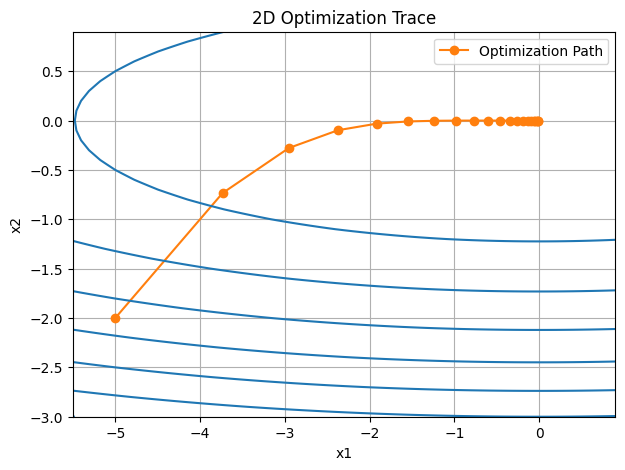

In [213]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
show_trace_2d(f_2d, train_2d(rmsprop_2d))

In [ ]:
def init_rmsprop_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] = gamma * s + (1 - gamma) * torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

开始训练...
loss: 0.242, 0.005 sec/interval
绘制损失曲线...


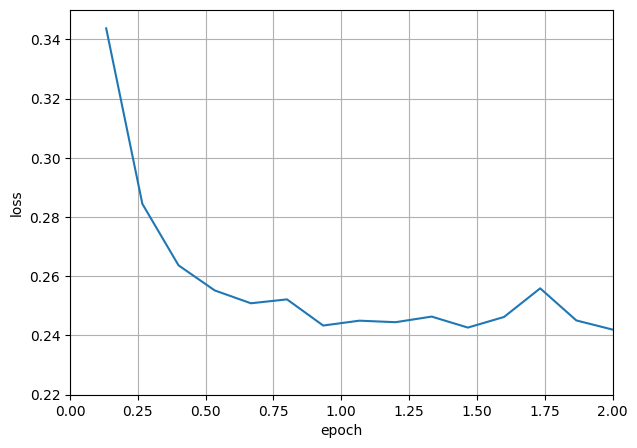

In [ ]:
data_iter, feature_dim = get_data_ch11(batch_size=10)
train_ch11(rmsprop, init_rmsprop_states(feature_dim),
               {'zlr': 0.01, 'gamma': 0.9}, data_iter, feature_dim);

loss: 7.081, 0.000 sec/interval


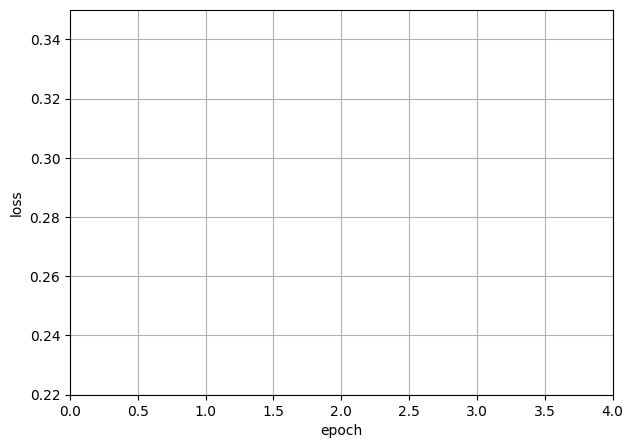

In [216]:
trainer = torch.optim.RMSprop
train_concise_ch11(trainer, {'lr': 0.01, 'alpha': 0.9},
                       data_iter)

In [217]:
import torch


def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            # In-placeupdatesvia[:]
            s[:] = rho * s + (1 - rho) * torch.square(p.grad)
            g = (torch.sqrt(delta + eps) / torch.sqrt(s + eps)) * p.grad
            p[:] -= g
            delta[:] = rho * delta + (1 - rho) * g * g
        p.grad.data.zero_()

开始训练...
loss: 0.244, 0.004 sec/interval
绘制损失曲线...


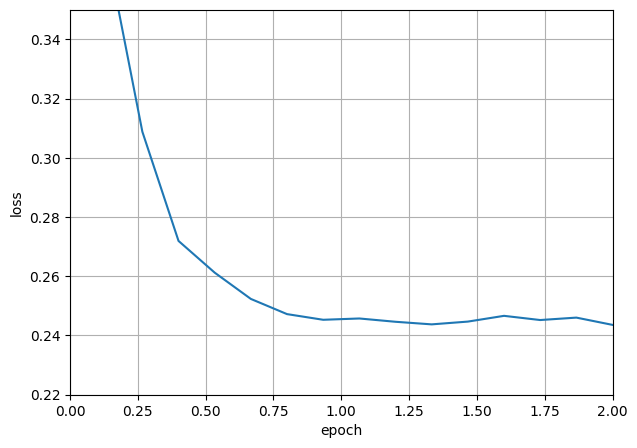

In [218]:
data_iter, feature_dim = get_data_ch11(batch_size=10)
train_ch11(adadelta, init_adadelta_states(feature_dim),
               {'rho': 0.9}, data_iter, feature_dim);

loss: 6.786, 0.000 sec/interval


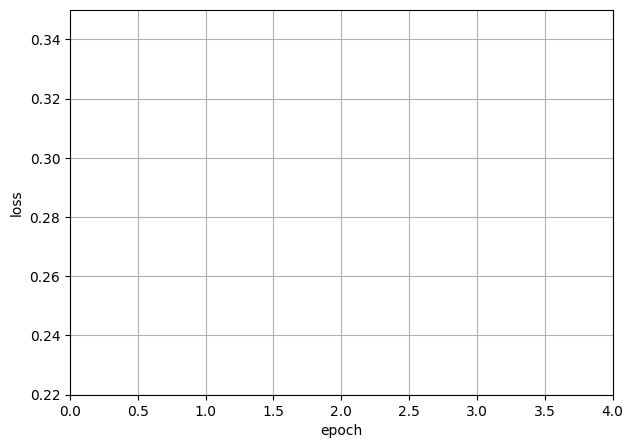

In [219]:
trainer = torch.optim.Adadelta
train_concise_ch11(trainer, {'rho': 0.9}, data_iter)

In [220]:
%matplotlib inline
import torch


def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                       + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

开始训练...
loss: 0.243, 0.007 sec/interval
绘制损失曲线...


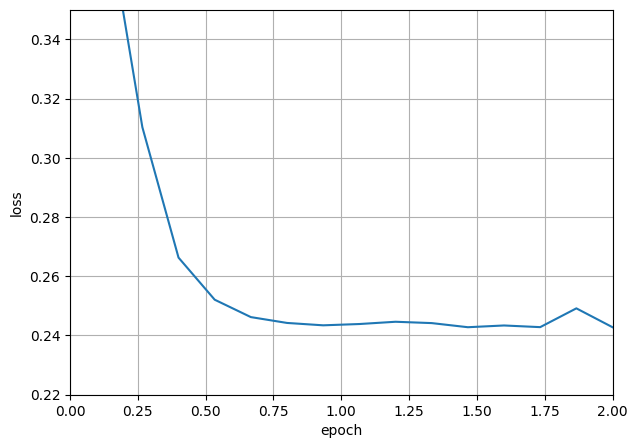

In [222]:
data_iter, feature_dim = get_data_ch11(batch_size=10)
train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);

loss: 7.058, 0.000 sec/interval


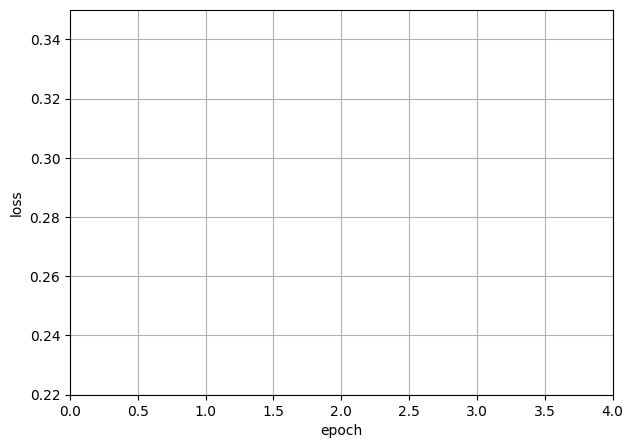

In [223]:
trainer = torch.optim.Adam
train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

开始训练...
loss: 0.243, 0.005 sec/interval
绘制损失曲线...


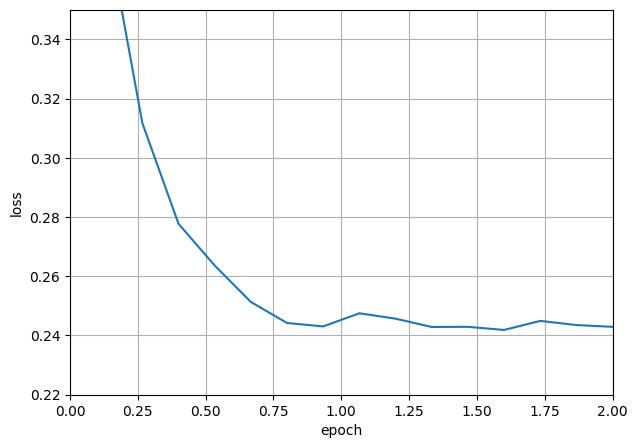

In [ ]:
def yogi(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-3
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = s + (1 - beta2) * torch.sign(
                torch.square(p.grad) - s) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                       + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

data_iter, feature_dim = get_data_ch11(batch_size=10)
train_ch11(yogi, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);

In [225]:
import torch
from torch.utils import data
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

def get_device():
    """获取可用的设备 (GPU或CPU)，替代 d2l.try_gpu。"""
    return torch.device('mps' if torch.cuda.is_available() else 'cpu')

def load_data_fashion_mnist(batch_size, resize=None):
    """下载并加载Fashion-MNIST数据集，替代 d2l.load_data_fashion_mnist。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    transform = transforms.Compose(trans)
    
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data", train=True, transform=transform, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data", train=False, transform=transform, download=True)
        
    return (data.DataLoader(mnist_train, batch_size, shuffle=True),
            data.DataLoader(mnist_test, batch_size, shuffle=False))

def accuracy(y_hat, y):
    """计算预测正确的数量，替代 d2l.accuracy。"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

def evaluate_accuracy(net, data_iter, device):
    """在指定数据集上评估模型的精度，替代 d2l.evaluate_accuracy_gpu。"""
    net.eval()  # 设置为评估模式
    acc_sum, n = 0.0, 0
    with torch.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            acc_sum += accuracy(net(X), y)
            n += y.numel()
    return acc_sum / n

from torch import nn

def net_fn():
    model = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(16 * 5 * 5, 120), nn.ReLU(),
        nn.Linear(120, 84), nn.ReLU(),
        nn.Linear(84, 10))
    return model

loss = nn.CrossEntropyLoss()

def train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
          scheduler=None):
    """训练模型，不依赖d2l包。"""
    net.to(device)
    
    # 用列表存储历史数据以供后续绘图
    history = {
        'train_loss': [], 
        'train_acc': [], 
        'test_acc': [],
        'epochs': [], # 记录每个数据点对应的epoch
        'steps': []   # 记录每个数据点对应的step
    }

    for epoch in range(num_epochs):
        # 初始化每个epoch的指标
        train_loss_sum, train_acc_sum, num_examples = 0.0, 0.0, 0
        
        net.train() # 设置为训练模式
        for i, (X, y) in enumerate(train_iter):
            trainer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            
            with torch.no_grad():
                # 累加当前batch的损失和精度
                train_loss_sum += l.item() * X.shape[0]
                train_acc_sum += accuracy(y_hat, y)
                num_examples += X.shape[0]

            # 每50个batch记录一次数据用于绘图
            if (i + 1) % 50 == 0:
                epoch_progress = epoch + (i + 1) / len(train_iter)
                current_train_acc = train_acc_sum / num_examples
                # 注意：这里的损失是到目前为止的平均损失，而不是瞬时损失
                current_train_loss = train_loss_sum / num_examples

                history['epochs'].append(epoch_progress)
                history['steps'].append(i)
                history['train_loss'].append(current_train_loss)
                history['train_acc'].append(current_train_acc)

        # 每个epoch结束后，评估测试集精度
        test_acc = evaluate_accuracy(net, test_iter, device)
        # 在每个epoch结束时，为test_acc添加一个点
        # 为了绘图对齐，train_loss和train_acc使用该epoch的最终值
        final_epoch_train_loss = train_loss_sum / num_examples
        final_epoch_train_acc = train_acc_sum / num_examples
        
        print(f'epoch {epoch + 1}, train loss {final_epoch_train_loss:.3f}, '
              f'train acc {final_epoch_train_acc:.3f}, test acc {test_acc:.3f}')
        
        # 更新学习率
        if scheduler:
            if scheduler.__module__ == lr_scheduler.__name__:
                scheduler.step()
            else:
                for param_group in trainer.param_groups:
                    param_group['lr'] = scheduler(epoch)

    # 训练结束后统一绘图
    plt.figure(figsize=(8, 6))
    plt.plot(history['epochs'], history['train_loss'], label='train loss')
    plt.plot(history['epochs'], history['train_acc'], label='train acc')
    # 为了绘制test_acc，我们需要为每个epoch创建一个x坐标
    epoch_ends = [i + 1 for i in range(num_epochs)]
    # 假设我们只在epoch结束时记录test_acc，所以需要手动提取
    # 这里我们简化一下，直接在最后打印，绘图部分只画训练曲线
    # 若要绘图，需要更复杂的历史记录逻辑，这里保持与打印一致
    
    plt.xlabel('epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'Final: train loss {final_epoch_train_loss:.3f}, '
          f'train acc {final_epoch_train_acc:.3f}, test acc {test_acc:.3f}')


# 设置参数
batch_size = 256
num_epochs = 10
lr = 0.1

# 获取设备和数据
device = get_device()
train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)

# 初始化模型和优化器
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

# 开始训练
train(net, train_iter, test_iter, num_epochs, loss, trainer, device)

epoch 1, train loss 1.393, train acc 0.475, test acc 0.580
epoch 2, train loss 0.684, train acc 0.735, test acc 0.756


KeyboardInterrupt: 

epoch 1, train loss 1.343, train acc 0.490, test acc 0.745
epoch 2, train loss 0.519, train acc 0.800, test acc 0.839
epoch 3, train loss 0.417, train acc 0.843, test acc 0.834
epoch 4, train loss 0.365, train acc 0.863, test acc 0.841
epoch 5, train loss 0.330, train acc 0.875, test acc 0.873
epoch 6, train loss 0.308, train acc 0.883, test acc 0.865
epoch 7, train loss 0.287, train acc 0.891, test acc 0.879
epoch 8, train loss 0.273, train acc 0.896, test acc 0.875
epoch 9, train loss 0.262, train acc 0.901, test acc 0.886
epoch 10, train loss 0.249, train acc 0.906, test acc 0.860
epoch 11, train loss 0.242, train acc 0.908, test acc 0.896
epoch 12, train loss 0.231, train acc 0.913, test acc 0.901
epoch 13, train loss 0.222, train acc 0.916, test acc 0.899
epoch 14, train loss 0.214, train acc 0.919, test acc 0.886
epoch 15, train loss 0.211, train acc 0.919, test acc 0.896
epoch 16, train loss 0.201, train acc 0.924, test acc 0.885
epoch 17, train loss 0.195, train acc 0.927, test

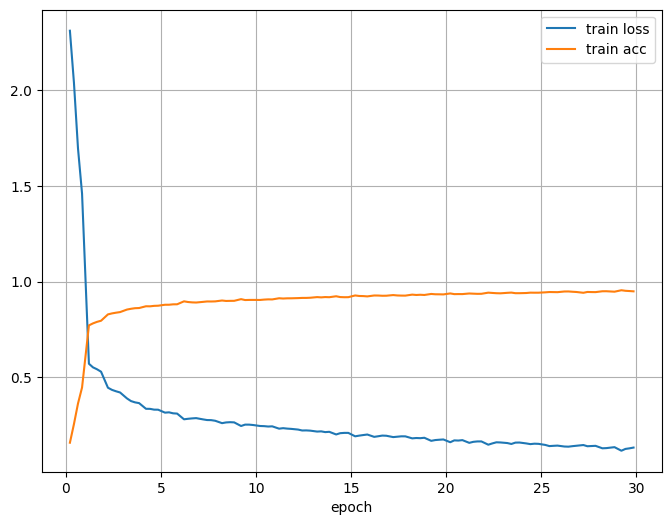

Final: train loss 0.133, train acc 0.949, test acc 0.902


In [226]:
lr, num_epochs = 0.3, 30
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device)

In [227]:
lr = 0.1
trainer.param_groups[0]["lr"] = lr
print(f'learning rate is now {trainer.param_groups[0]["lr"]:.2f}')

learning rate is now 0.10


In [228]:
class SquareRootScheduler:
    def __init__(self, lr=0.1):
        self.lr = lr

    def __call__(self, num_update):
        return self.lr * pow(num_update + 1.0, -0.5)

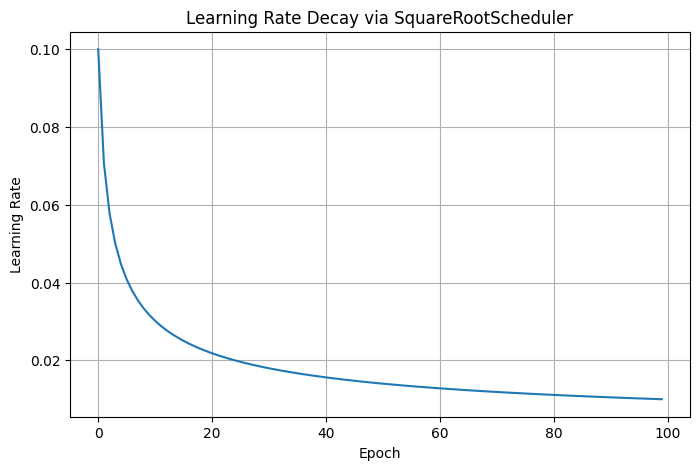

In [229]:
import torch
import matplotlib.pyplot as plt

# --- 假设上面的 SquareRootScheduler 类已经定义 ---

# 设置要模拟的总 epoch 数量
num_epochs = 100

# 1. 实例化调度器 (与原代码相同)
scheduler = SquareRootScheduler(lr=0.1)

# 2. 准备绘图数据
# x 轴数据：从 0 到 num_epochs-1 的整数
x_data = torch.arange(num_epochs)
# y 轴数据：每个 epoch 对应的学习率
y_data = [scheduler(t) for t in range(num_epochs)]

# 3. 使用 Matplotlib 绘图 (替代 d2l.plot)
plt.figure(figsize=(8, 5)) # 设置画布大小
# .numpy() 将 PyTorch 张量转换为 NumPy 数组，这是 Matplotlib 的标准输入格式
plt.plot(x_data.numpy(), y_data)

# 4. 添加标签、标题和网格，使图表更清晰
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Decay via SquareRootScheduler')
plt.grid(True) # 添加背景网格

# 5. 显示图表
plt.show()

In [231]:
from torch.optim import lr_scheduler

net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
      scheduler)

epoch 1, train loss 1.428, train acc 0.469, test acc 0.675
epoch 2, train loss 0.707, train acc 0.725, test acc 0.731
epoch 3, train loss 0.542, train acc 0.794, test acc 0.807
epoch 4, train loss 0.477, train acc 0.823, test acc 0.803
epoch 5, train loss 0.439, train acc 0.837, test acc 0.802
epoch 6, train loss 0.416, train acc 0.846, test acc 0.818
epoch 7, train loss 0.395, train acc 0.854, test acc 0.848
epoch 8, train loss 0.382, train acc 0.858, test acc 0.854
epoch 9, train loss 0.370, train acc 0.864, test acc 0.857
epoch 10, train loss 0.359, train acc 0.867, test acc 0.852
epoch 11, train loss 0.351, train acc 0.871, test acc 0.850
epoch 12, train loss 0.344, train acc 0.873, test acc 0.853
epoch 13, train loss 0.337, train acc 0.875, test acc 0.869
epoch 14, train loss 0.331, train acc 0.879, test acc 0.868
epoch 15, train loss 0.325, train acc 0.881, test acc 0.869
epoch 16, train loss 0.320, train acc 0.882, test acc 0.873
epoch 17, train loss 0.315, train acc 0.884, test

KeyboardInterrupt: 